## Object tracking

This is the classical object tracking problem, where the 4-dimensional state vector $x_k=[p_k, v_k]^T$ is the objects 2-d position $p_k$ and 2-d velocity $v_k$. Object moves with constant velocity through the discrete time steps of length $\Delta t$, and the velocity changes "smoothly" between time steps. The forward model thus reads as

$p_k=p_{k-1}+\Delta t v_{k-1} + e_p$

$v_k=v_{k-1}+e_v$

Only the position is observed. Here, we have $\Delta t = 1$.

In [1]:
import numpy as np
import minkf as kf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = np.genfromtxt('observations.csv', delimiter=',')

In [3]:
obs = list(data[:,1:])

x0 = np.array([10.0, 10.0, 1.0, 0.0])
Cest0 = np.eye(4)

M = np.array([[1.0, 0.0, 1.0, 0.0],
              [0.0, 1.0, 0.0, 1.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
K = np.array([[1.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0]])

Q = 0.1*np.eye(4)
R = 0.1*np.eye(2)

In [4]:
res_kf = kf.run_filter(obs, x0, Cest0, M, K, Q, R, likelihood=True)
res_smo = kf.run_smoother(obs, x0, Cest0, M, K, Q, R)

In [5]:
res_kf['loglike']

55.33911902572807

<IPython.core.display.Javascript object>


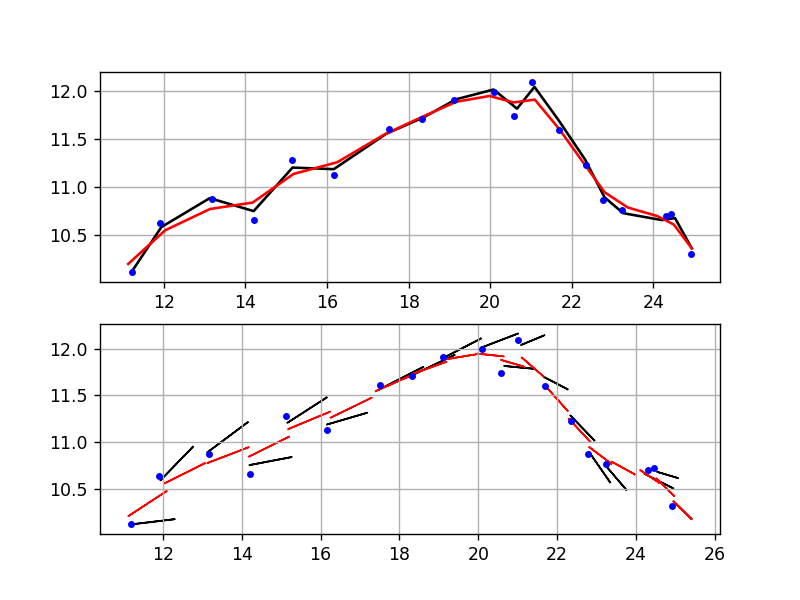

In [6]:
plt.figure()

plt.subplot(211)
plt.plot(np.array(res_kf['x'])[:,0], np.array(res_kf['x'])[:,1], 'k-')
plt.plot(np.array(res_smo['x'])[:,0], np.array(res_smo['x'])[:,1], 'r-')
plt.plot(data[:,1], data[:,2], 'b.')
plt.grid(True)

plt.subplot(212)
for s_kf, s_smo in zip(res_kf['x'], res_smo['x']):
    plt.arrow(*s_kf, color='k')
    plt.arrow(*s_smo, color='r')
plt.plot(data[:,1], data[:,2], 'b.')

plt.grid(True)
plt.show()

In [7]:
samps = kf.sample(res_kf, M, Q, nsamples=20)

<IPython.core.display.Javascript object>


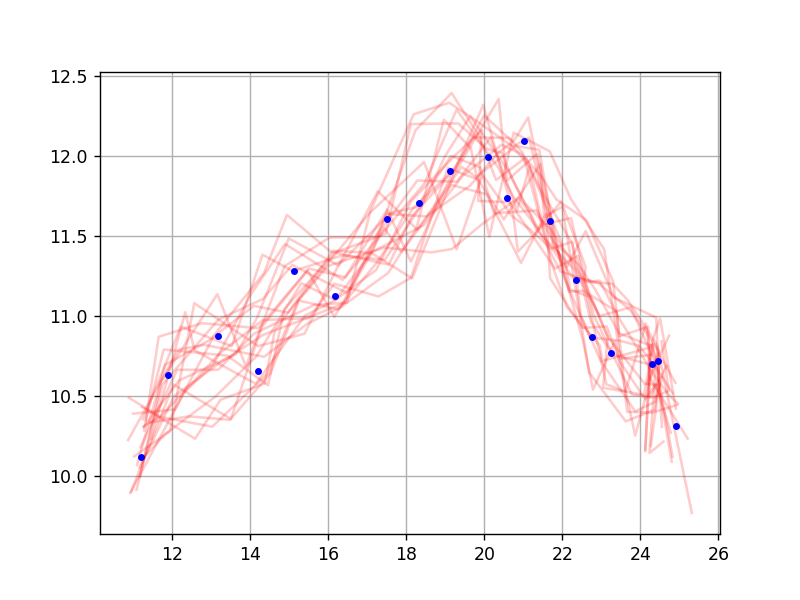

In [8]:
plt.figure()

for samp in samps:
    plt.plot(samp[:,0], samp[:,1], 'r-', alpha=0.2)

plt.plot(data[:,1], data[:,2], 'b.')
plt.grid(True)
plt.show()